In [67]:
import skmob
import pandas as pd
from skmob.preprocessing import detection, clustering


def get_week(device_id):
    stdf = skmob.TrajDataFrame.from_file('./staypoint/53/stay_points.csv', latitude='latitude', longitude='longitude', user_id='deviceid', datetime='arrive_time')

    stdf.rename(columns={'leaving_time': 'leaving_datetime'}, inplace=True)
    stdf['leaving_datetime'] = pd.to_datetime(stdf['leaving_datetime'])

    weeks = [g for n, g in stdf.set_index('datetime').groupby(pd.Grouper(freq='W'))]
    
    return weeks



stdf = skmob.TrajDataFrame.from_file('./staypoint/53/stay_points.csv', latitude='latitude', longitude='longitude', user_id='deviceid', datetime='arrive_time')

stdf.rename(columns={'leaving_time': 'leaving_datetime'}, inplace=True)
stdf['leaving_datetime'] = pd.to_datetime(stdf['leaving_datetime'])

print(stdf.head())

map_f = stdf.plot_trajectory(max_points=1000, start_end_markers=False)
stdf.plot_stops(map_f=map_f)

   uid        lat         lng            datetime    leaving_datetime
0   53  37.570761  127.034212 2019-10-24 02:37:58 2019-10-24 04:42:10
1   53  37.570762  127.034217 2019-10-24 05:09:18 2019-10-24 08:39:30
2   53  37.560932  127.032245 2019-10-24 09:21:04 2019-10-24 10:03:08
3   53  37.560945  127.032240 2019-10-24 10:18:16 2019-10-24 23:21:12
4   53  37.564035  127.036923 2019-10-24 23:25:18 2019-10-25 00:41:02


/Users/lordly/opt/anaconda3/envs/skmob/lib/python3.7/site-packages/skmob/core/trajectorydataframe.py:571: UserWarning: Only the trajectories of the first 10 users will be plotted. Use the argument `max_users` to specify the desired number of users, or filter the TrajDataFrame.
  start_end_markers=start_end_markers, control_scale=control_scale)
/Users/lordly/opt/anaconda3/envs/skmob/lib/python3.7/site-packages/skmob/core/trajectorydataframe.py:571: UserWarning: If necessary, trajectories will be down-sampled to have at most `max_points` points. To avoid this, specify `max_points=None`.
  start_end_markers=start_end_markers, control_scale=control_scale)
/Users/lordly/opt/anaconda3/envs/skmob/lib/python3.7/site-packages/skmob/core/trajectorydataframe.py:648: UserWarning: Only the stops of the first 10 users will be plotted. Use the argument `max_users` to specify the desired number of users, or filter the TrajDataFrame.
  popup=popup, control_scale=control_scale)


In [68]:
# 주단위로 묶어냄
weeks = [g for n, g in stdf.set_index('datetime').groupby(pd.Grouper(freq='W'))]
print(weeks[0].reset_index())
# print(weeks[0])

              datetime  uid        lat         lng    leaving_datetime
0  2019-10-24 02:37:58   53  37.570761  127.034212 2019-10-24 04:42:10
1  2019-10-24 05:09:18   53  37.570762  127.034217 2019-10-24 08:39:30
2  2019-10-24 09:21:04   53  37.560932  127.032245 2019-10-24 10:03:08
3  2019-10-24 10:18:16   53  37.560945  127.032240 2019-10-24 23:21:12
4  2019-10-24 23:25:18   53  37.564035  127.036923 2019-10-25 00:41:02
5  2019-10-25 03:17:50   53  38.076584  127.320265 2019-10-25 04:04:01
6  2019-10-25 05:23:11   53  38.067250  127.325462 2019-10-25 06:27:01
7  2019-10-25 08:53:39   53  37.562298  127.035562 2019-10-25 12:01:18
8  2019-10-25 12:12:30   53  37.560922  127.032230 2019-10-26 08:49:13
9  2019-10-26 08:53:16   53  37.560868  127.038064 2019-10-26 09:27:34
10 2019-10-26 09:27:34   53  37.559276  127.034890 2019-10-26 13:04:57
11 2019-10-26 13:07:01   53  37.560921  127.032232 2019-10-27 04:02:46
12 2019-10-27 05:08:45   53  37.569242  126.978103 2019-10-27 06:03:41
13 201

In [69]:
def get_cluster(weeks):
    cluster_list = []

    for x in weeks:
        cstdf = clustering.cluster(x.reset_index(), cluster_radius_km=0.1, min_samples=1)
        cluster_list.append(cstdf)
    return cluster_list


cluster_list = []

for x in weeks:
    cstdf = clustering.cluster(x.reset_index(), cluster_radius_km=0.1, min_samples=1)
    cluster_list.append(cstdf)
    # print(cstdf.head())

    # cstdf = cstdf.astype({'leaving_datetime': 'datetime64'})
    # cstdf['leaving_datetime'] = pd.to_datetime(cstdf['leaving_datetime'])


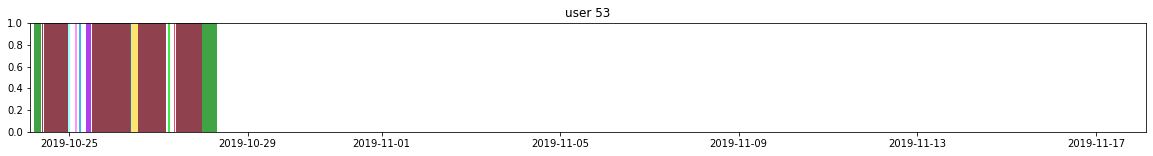

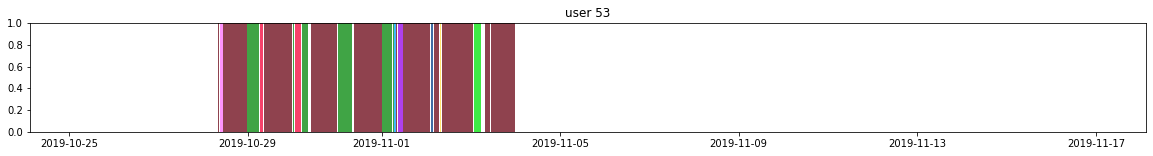

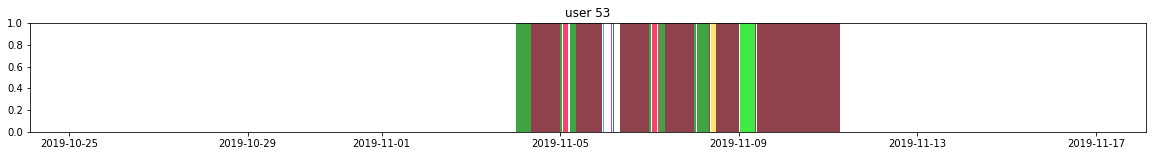

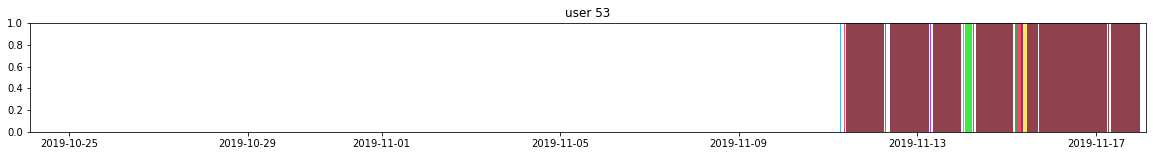

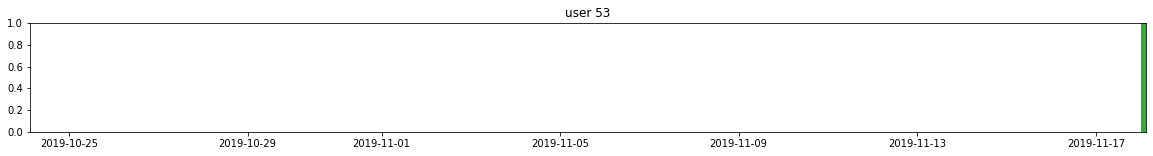

In [70]:
for x in cluster_list:
    user = 53
    start_datetime = pd.to_datetime('2019-10-24 030000')
    end_datetime = pd.to_datetime('2019-11-18 030000')

    ax = x.plot_diary(user, start_datetime=start_datetime, end_datetime=end_datetime)

In [71]:
# for x in cluster_list:
#     map_f = stdf.plot_trajectory(max_points=1000, start_end_markers=False)
#     x.plot_stops(map_f=map_f)



# map_f = weeks[0].reset_index().plot_trajectory(max_points=1000, start_end_markers=False)
# cluster_list[0].plot_stops(map_f=map_f)

In [126]:
def get_rep_cluster(cluster_list):
    rep_cluster_list = []
    for df in cluster_list:
        idx = df[df['cluster'] == 0].index
        ndf = df.drop(idx)
        ndf['year'] = ndf['datetime'].map(lambda x: x.isocalendar()[0])
        ndf['week'] = ndf['datetime'].map(lambda x: x.isocalendar()[1])
        ndf = ndf.groupby('cluster').mean()
        ndf['year'] = ndf['year'].astype('object')
        rep_cluster_list.append(ndf)

    return rep_cluster_list





# cluster를 group 별로 묶어내기
# cluster의 크기가 가장 큰 것은 집으로 판단하고 제외함 (가장 큰 cluster는 항상 0번 cluster이므로 0번 cluster를 제외시킴)
temp = cluster_list[2]
idx = temp[temp['cluster'] == 0].index
temp = temp.drop(idx)
# print(temp.groupby('cluster').size())
# print(temp['datetime'][0].isocalendar())
temp['year'] = temp['datetime'].map(lambda x: x.isocalendar()[0])
temp['week'] = temp['datetime'].map(lambda x: x.isocalendar()[1])

# print(temp['year'].dtype)
# print(temp.head())

# 평균값을 취해서 cluster별로 좌표 추출
temp = temp.groupby('cluster').mean()
temp['year'] = temp['year'].astype('object')
print(temp.dtypes)

print(temp.values.tolist())

uid       int64
lat     float64
lng     float64
year     object
week      int64
dtype: object
[[53, 37.57074559285714, 127.03419832857142, 2019, 45], [53, 37.56512313333334, 127.05578851666667, 2019, 45], [53, 37.5207879, 126.9777805, 2019, 45], [53, 37.5623319, 127.0355905, 2019, 45], [53, 37.518007, 127.0715192, 2019, 45], [53, 37.5168406, 127.0703861, 2019, 45], [53, 37.5610911, 127.03651815, 2019, 45]]


In [73]:
import csv, os




# print(os.listdir('./'))


device_id_list = []
for it in os.scandir('./staypoint'):
    if it.is_dir():
        if it.name.isdigit():
            device_id_list.append(it.name)

print(device_id_list)



['61', '95', '59', '104', '103', '331', '150', '51', '58', '93', '94', '60', '397', '151', '216', '211', '218', '274', '273', '287', '210', '217', '228', '272', '275', '401', '268', '250', '266', '261', '260', '258', '251', '256', '174', '173', '142', '129', '116', '118', '87', '80', '172', '81', '86', '110', '322', '128', '88', '395', '65', '136', '62', '96', '100', '54', '107', '98', '138', '53', '393', '394', '99', '52', '139', '108', '63', '64', '270', '212', '271', '213', '209', '207', '253', '254', '402', '262', '265', '208', '264', '263', '255', '403', '252', '79', '112', '318', '115', '83', '123', '141', '328', '85', '317', '125', '319', '113', '147', '140', '149']


In [127]:
for device_id in device_id_list:
        fields = ['deviceid', 'latitude', 'longitude', 'year', 'week']
        path = "./staypoint/" + device_id
        weeks = get_week(device_id)
        cluster_list = get_cluster(weeks)
        represent = get_rep_cluster(cluster_list)

        with open("./staypoint/"+device_id+'/cluster.csv', 'w',newline='') as f:
            write = csv.writer(f)
            write.writerow(fields)

            for df in represent:
                rep = df.values.tolist()
                print(rep)
                write.writerows(rep)

[[53, 37.57075913333333, 127.0342113, 2019, 43], [53, 37.5422953, 127.0442039, 2019, 43], [53, 37.5692417, 126.9781033, 2019, 43], [53, 37.5592756, 127.0348895, 2019, 43], [53, 37.5608683, 127.0380635, 2019, 43], [53, 37.5622984, 127.035562, 2019, 43], [53, 38.0672498, 127.3254623, 2019, 43], [53, 38.0765843, 127.3202646, 2019, 43], [53, 37.5640354, 127.03692325, 2019, 43]]
[[53, 37.57074855, 127.03419935, 2019, 44], [53, 37.5651321, 127.0557772, 2019, 44], [53, 37.5132894, 127.0316504, 2019, 44], [53, 37.569108, 127.0104512, 2019, 44], [53, 37.5423061, 127.04442905, 2019, 44], [53, 37.5623308, 127.0355777, 2019, 44], [53, 37.56203835, 127.0343656, 2019, 44], [53, 37.5619321, 127.03827015, 2019, 44]]
[[53, 37.57074559285714, 127.03419832857142, 2019, 45], [53, 37.56512313333334, 127.05578851666667, 2019, 45], [53, 37.5207879, 126.9777805, 2019, 45], [53, 37.5623319, 127.0355905, 2019, 45], [53, 37.518007, 127.0715192, 2019, 45], [53, 37.5168406, 127.0703861, 2019, 45], [53, 37.5610911,